# Import the required libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2



```
Explanation:

Importing the necessary libraries for data manipulation (np), deep learning (tf) and visualization (plt,sklearn).
```



# Data Acquisition  






```
Explanation:

Loading the CIFAR-10 dataset from Keras into training and testing sets as the Dataset contains images from different classes and samples of 50K.
```



In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## Observations from the Dataset.

1. Size of the dataset




In [ ]:
print("2.1-1 : CIFAR10: Size of the dataset:")
print("Training dataset imported from Keras:", x_train.shape[0])
print("Testing dataset imported from Keras:", x_test.shape[0])

2.1-1 : CIFAR10: Size of the dataset:
Training dataset imported from Keras: 50000
Testing dataset imported from Keras: 10000


2. What type of data attributes are there?


In [ ]:
print("Type of data attributes:")
print("Image shape:", x_train.shape[1:])
print("Data type:", x_train.dtype, " : ", type(x_train))

Type of data attributes:
Image shape: (32, 32, 3)
Data type: uint8  :  <class 'numpy.ndarray'>


In [ ]:
data_attributes = {"X_train": x_train, "y_train": y_train, "X_test": x_test, "y_test": y_test}
for attribute_name, attribute_data in data_attributes.items():
    print(attribute_name + " shape:", attribute_data.shape)
    print(attribute_name + " data type:", attribute_data.dtype)

X_train shape: (50000, 32, 32, 3)
X_train data type: uint8
y_train shape: (50000, 1)
y_train data type: uint8
X_test shape: (10000, 32, 32, 3)
X_test data type: uint8
y_test shape: (10000, 1)
y_test data type: uint8


In [ ]:
print("The unique target values are", np.unique(y_train))
print("The unique training values are", np.unique(x_train))

The unique target values are [0 1 2 3 4 5 6 7 8 9]
The unique training values are [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 2

3. What are you classifying?

In [ ]:
num_classes = len(np.unique(y_train))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("Classes:")
for i, class_name in enumerate(class_names):
    print(i, "-", class_name)

## The above dataset of classes are taken from the dataset provider website: Tensorflow.
# This is just to showcase the class names by predefining it and then looping through the complete classes to display them.

#Printing size of the dataset: considering the ith image: ith=1

image_size = x_train[1].shape
print(f"Image size:", image_size)

Classes:
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck
Image size: (32, 32, 3)


4. Plot the distribution of the categories of the target / label.

In [ ]:
plt.figure(figsize=(12, 6)) #defining the plot size

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fad8af06140>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

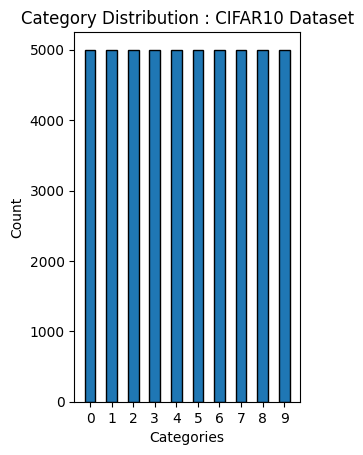

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(11) - 0.5, rwidth=0.5, edgecolor="black")
plt.title("Category Distribution : CIFAR10 Dataset")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(range(10))

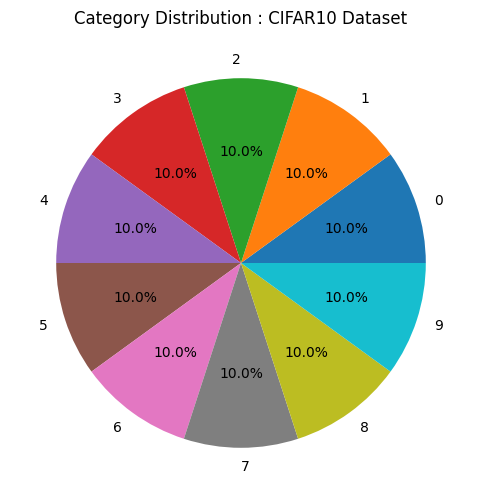

In [ ]:
plt.figure(figsize=(6, 6))
category_counts = np.bincount(y_train.flatten())
plt.pie(category_counts, labels=range(10), autopct='%1.1f%%')
plt.title("Category Distribution : CIFAR10 Dataset")
plt.show()

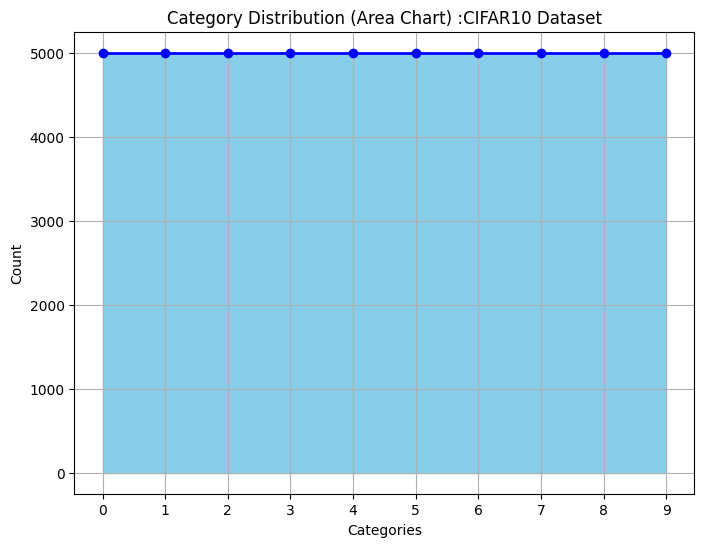

In [ ]:
plt.figure(figsize=(8, 6))
category_counts = np.bincount(y_train.flatten())
plt.fill_between(range(10), category_counts, color='skyblue')
plt.plot(range(10), category_counts, marker='o', color='blue', linewidth=2)
plt.title("Category Distribution (Area Chart) :CIFAR10 Dataset")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(range(10))
plt.grid(True)
plt.show()



```
Explanation:

*   Visualizations provided above represent the distribution of the target categories in the CIFAR-10 database.
*   This shows the dataset is evenly distributed across all the target categories with 10% contribution each
```



# Data Preparation

## Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization



```
Explanation:


1. to remove duplicate data
Not applicable: Dataset contains of labeled images, and each image is unique.

2. to impute or remove missing data
Not applicable: CIFAR10 dataset does not contain missing data as the dataset is well articulated by Tensorflow.

3. to remove data inconsistencies
Not applicable: Dataset is already preprocessed and consistent.
The images have same dimensions & pixel values.

4. Encode categorical data
Not applicable: Dataset is already encoded with numerical values i.e integers representing the classes in the dataset.

7. Stop word removal, lemmatiation, stemming, vectorization
Not applicable: As the dataset is of image, these technique are majorly for NLP based tasks.



```



In [ ]:
#5. Normalize the data
# Normalizing the pixel value of the image is done to ensure the features have a similar scale.  Normalizing the color value in the range from (0, 255) to (0, 1).

x_train = x_train/np.ptp(x_train)
x_test = x_test/np.ptp(x_test)

print("Normalized Pixel Values (Training Set): \n",x_train[0])
print("\n \n Normalized Pixel Values (Testing Set): \n",x_test[0])

#6. Feature Engineering
# -1 is for keeping first dimension as is.
#2nd dimension is kept blank to ensures that the other dimensions are flattened.
print("\n \n Post Flattening :")
y_train, y_test = (y_train.reshape(-1,), y_test.reshape(-1,))
print(y_train.shape)
print(y_test.shape)

Normalized Pixel Values (Training Set): 
 [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647

## Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:

y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype='float32')
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 10, dtype='float32')

print("X_train shape:", x_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_test shape:", x_test.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

y_train=y_train_encoded
y_test=y_test_encoded

X_train shape: (50000, 32, 32, 3)
y_train_encoded shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test_encoded shape: (10000, 10)


In [ ]:
#Class Names
target_class_labels= class_names
print(target_class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Split the data into training set and testing set



```
Explanation:


Spliting the data into training and Testing dataset is ideally not required.
CIFAR10 Dataset as the dataset downloaded already contains a split of Train and Test data (PFB details).

```



In [ ]:
data_attributes = {"X_train": x_train, "y_train": y_train, "X_test": x_test, "y_test": y_test}
for attribute_name, attribute_data in data_attributes.items():
    print(attribute_name + " shape:", attribute_data.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## Preprocessing report

* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used




```
Explanation:

As CIFAR10 dataset is image dataset with categorical data and data oriented data.
From step 3.1 as demonstrated:
No need of any preprocessing technique.
```



# Deep Neural Network Architecture


## Design the architecture

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    keras.layers.Dense(10, activation='sigmoid'),  #Output layer using Sigmoid function
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1024)              3073024   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8

## Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
print("DNN Report:")
print("Number of layers (excluding Flatten layer):", len(model.layers) - 1)
print("\nNumber of units in each layer:")

for i in range(len(model.layers)):
    print("\t Number of units in layer #", (i+1), "=", model.layers[i].output_shape[1])

print("\nTotal number of trainable parameters:", model.count_params())

DNN Report:
Number of layers (excluding Flatten layer): 8

Number of units in each layer:
	 Number of units in layer # 1 = 3072
	 Number of units in layer # 2 = 3000
	 Number of units in layer # 3 = 1024
	 Number of units in layer # 4 = 512
	 Number of units in layer # 5 = 256
	 Number of units in layer # 6 = 128
	 Number of units in layer # 7 = 64
	 Number of units in layer # 8 = 32
	 Number of units in layer # 9 = 10

Total number of trainable parameters: 12991714


# Training the model


## Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
model.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)

In [ ]:
history = model.fit(x_train,y_train, epochs=20, validation_split=(1/20))

Epoch 1/20
1485/1485 [==============================] - 15s 6ms/step - loss: 1.9354 - accuracy: 0.0000e+00 - val_loss: 1.7530 - val_accuracy: 0.0000e+00
Epoch 2/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.6906 - accuracy: 0.0000e+00 - val_loss: 1.6585 - val_accuracy: 0.0000e+00
Epoch 3/20
1485/1485 [==============================] - 8s 6ms/step - loss: 1.5966 - accuracy: 0.0000e+00 - val_loss: 1.6987 - val_accuracy: 0.0000e+00
Epoch 4/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.5247 - accuracy: 0.0000e+00 - val_loss: 1.6915 - val_accuracy: 0.0000e+00
Epoch 5/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.4650 - accuracy: 0.0000e+00 - val_loss: 1.5753 - val_accuracy: 0.0000e+00
Epoch 6/20
1485/1485 [==============================] - 8s 5ms/step - loss: 1.4170 - accuracy: 0.0000e+00 - val_loss: 1.4625 - val_accuracy: 0.0000e+00
Epoch 7/20
1485/1485 [==============================] - 9s 6ms/step - loss: 1.3753 - ac



```
Explanation:

Using Stochastic Gradient Descent (SGD) to Optimize Deep learning models for CIFAR10.

Justification:
SGD updates the model parameter based on Gradients computed on the mini batch or subset of Training Data.
This helps in handling the large dataset like CIFAR10 efficiently.
SGD performance in optimizinf the weights over time & finding a good set of parameter is well performed.

Hyperparameters:
The learning rate, momentum and decay rate are crucial parameters for SGD and can be tuned based on requirements of the model.
The above parameters control the size of weight updates, influence of past gradients and learning rate decay resp.

---------------------------------
```



# Test the model


In [ ]:
model.evaluate(x_test, y_test,return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 1.6948 - accuracy: 1.0000e-05


{'loss': 1.6947813034057617, 'accuracy': 9.999999747378752e-06}

# Result



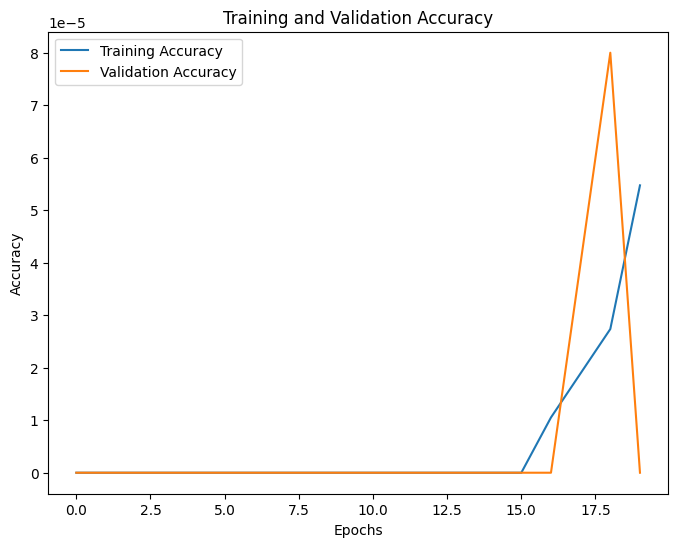

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

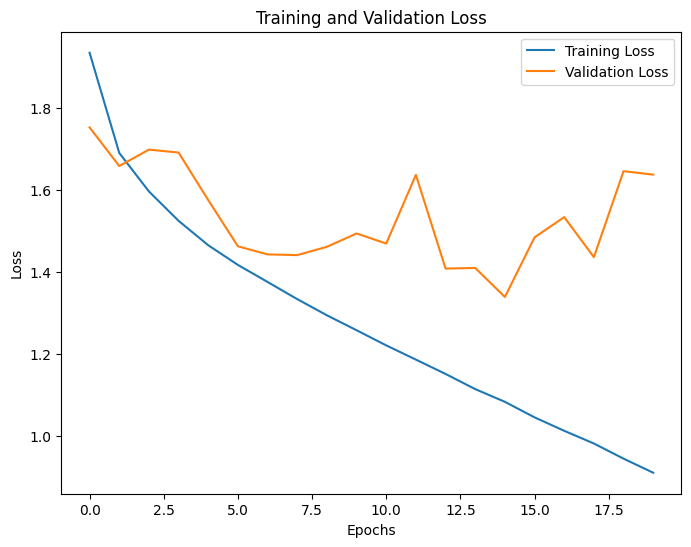

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, return_dict=True)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.6948 - accuracy: 1.0000e-05
Test Loss: loss
Test Accuracy: accuracy


313/313 [==============================] - 1s 3ms/step


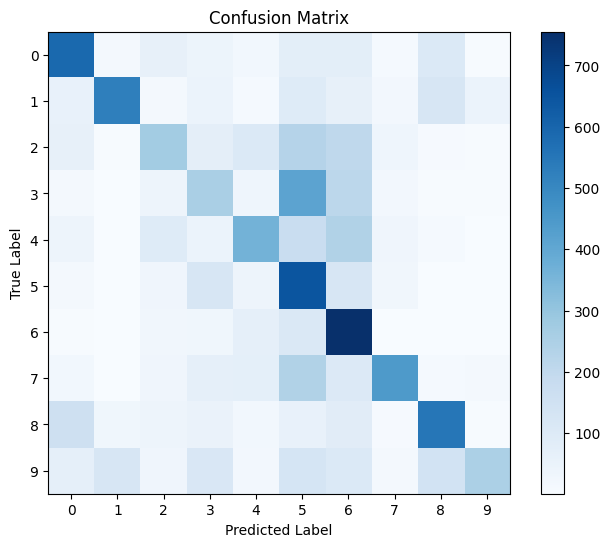

In [ ]:
# Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Report performance study metrics
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58      1000
           1       0.75      0.52      0.62      1000
           2       0.42      0.27      0.33      1000
           3       0.30      0.26      0.28      1000
           4       0.48      0.36      0.41      1000
           5       0.30      0.65      0.41      1000
           6       0.38      0.76      0.51      1000
           7       0.72      0.44      0.55      1000
           8       0.58      0.55      0.56      1000
           9       0.74      0.25      0.37      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



# Model architecture


Modifying the initial architecture designed above

1. by decreasing one layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_9 (Dense)             (None, 1024)              3073024   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)               

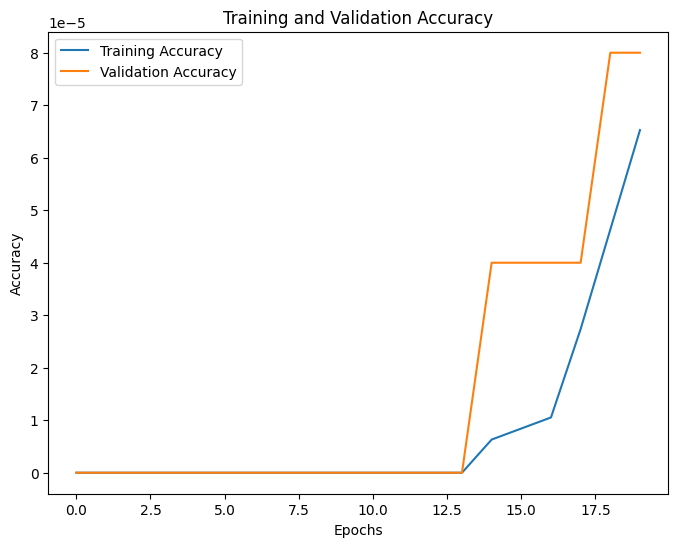

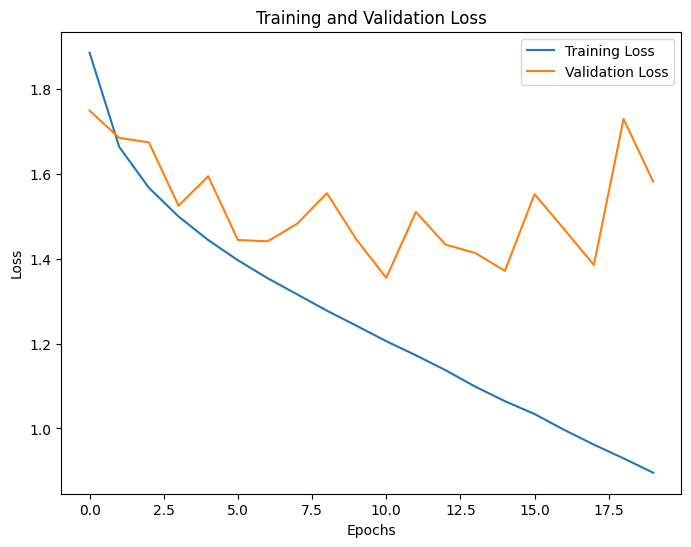

313/313 [==============================] - 1s 3ms/step - loss: 1.6081 - accuracy: 9.0000e-05
Test Loss: loss
Test Accuracy: accuracy
313/313 [==============================] - 1s 2ms/step


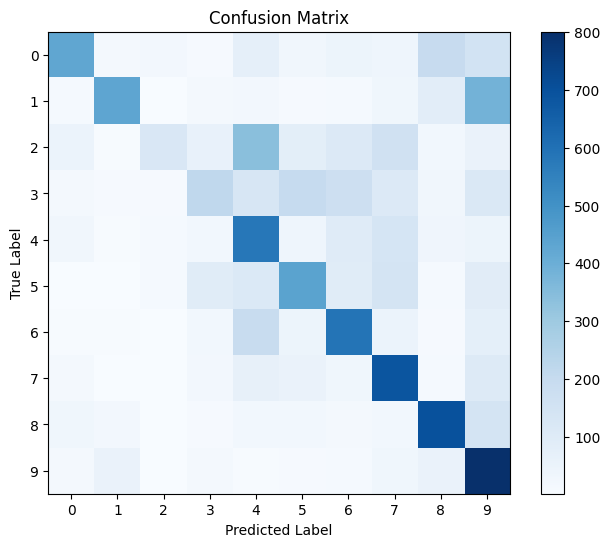

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.43      0.53      1000
           1       0.77      0.43      0.55      1000
           2       0.64      0.12      0.20      1000
           3       0.44      0.21      0.29      1000
           4       0.38      0.58      0.46      1000
           5       0.48      0.44      0.46      1000
           6       0.50      0.59      0.54      1000
           7       0.49      0.69      0.57      1000
           8       0.61      0.70      0.65      1000
           9       0.41      0.80      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.48     10000
weighted avg       0.54      0.50      0.48     10000



In [ ]:
#8.1 : Considering the reduction of 1 layer.

modeldec = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    keras.layers.Dense(10, activation='sigmoid'),  #Output layer using Sigmoid function
])
modeldec.summary()

print("DNN Report:")
print("Number of layers (excluding Flatten layer):", len(modeldec.layers) - 1)
print("\nNumber of units in each layer:")

for i in range(len(modeldec.layers)):
    print("\t Number of units in layer #", (i+1), "=", modeldec.layers[i].output_shape[1])

print("\nTotal number of trainable parameters:", modeldec.count_params())

modeldec.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)

history2 = modeldec.fit(x_train,y_train, epochs=20, validation_split=(1/20))

modeldec.evaluate(x_test, y_test,return_dict=True)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the modeldec on test set
test_loss, test_accuracy = modeldec.evaluate(x_test, y_test, return_dict=True)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate confusion matrix
y_pred = modeldec.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Report performance study metrics
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", classification_rep)

2. by increasing one layer


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_16 (Dense)            (None, 1024)              3073024   
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)               

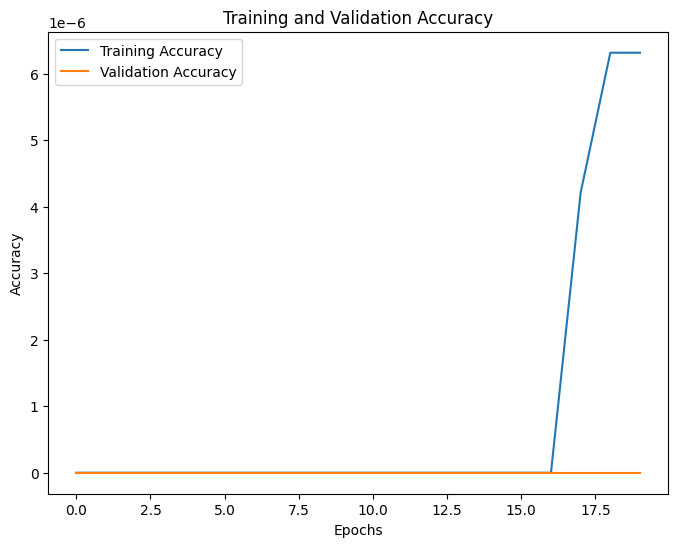

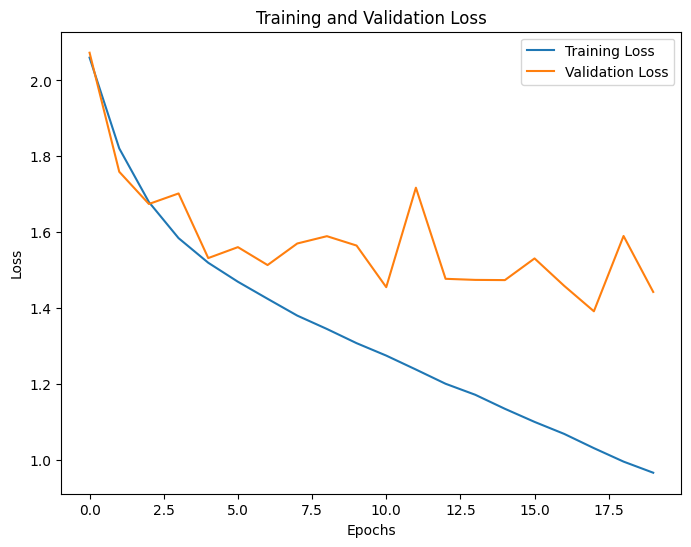

313/313 [==============================] - 1s 3ms/step - loss: 1.4567 - accuracy: 1.0000e-05
Test Loss: loss
Test Accuracy: accuracy
313/313 [==============================] - 1s 2ms/step


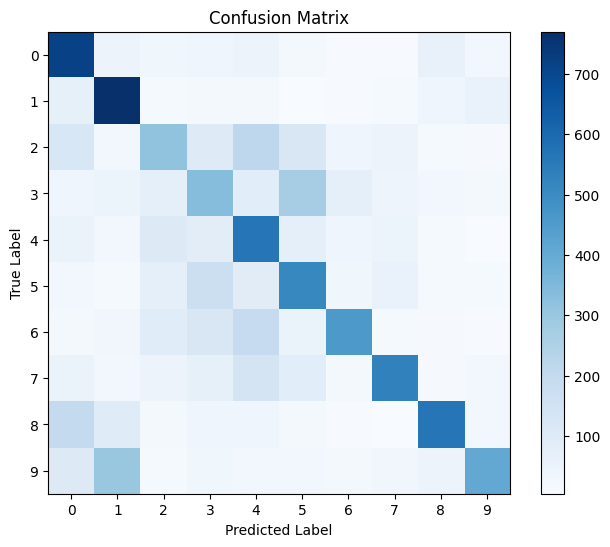

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.72      0.60      1000
           1       0.56      0.77      0.65      1000
           2       0.41      0.31      0.35      1000
           3       0.34      0.33      0.33      1000
           4       0.40      0.56      0.47      1000
           5       0.43      0.51      0.47      1000
           6       0.66      0.46      0.54      1000
           7       0.67      0.53      0.59      1000
           8       0.71      0.56      0.63      1000
           9       0.68      0.41      0.51      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000



In [ ]:
#8.2 : Considering the increase of 1 layer.

modeldec = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    keras.layers.Dense(16, activation = "relu"),  #Hidden layer 8
    keras.layers.Dense(10, activation='sigmoid'),  #Output layer using Sigmoid function
])
modeldec.summary()

print("DNN Report:")
print("Number of layers (excluding Flatten layer):", len(modeldec.layers) - 1)
print("\nNumber of units in each layer:")

for i in range(len(modeldec.layers)):
    print("\t Number of units in layer #", (i+1), "=", modeldec.layers[i].output_shape[1])

print("\nTotal number of trainable parameters:", modeldec.count_params())

modeldec.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)

history3 = modeldec.fit(x_train,y_train, epochs=20, validation_split=(1/20))

modeldec.evaluate(x_test, y_test,return_dict=True)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the modeldec on test set
test_loss, test_accuracy = modeldec.evaluate(x_test, y_test, return_dict=True)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate confusion matrix
y_pred = modeldec.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Report performance study metrics
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", classification_rep)

Ploting the comparison of the training and validation accuracy of the three architecures

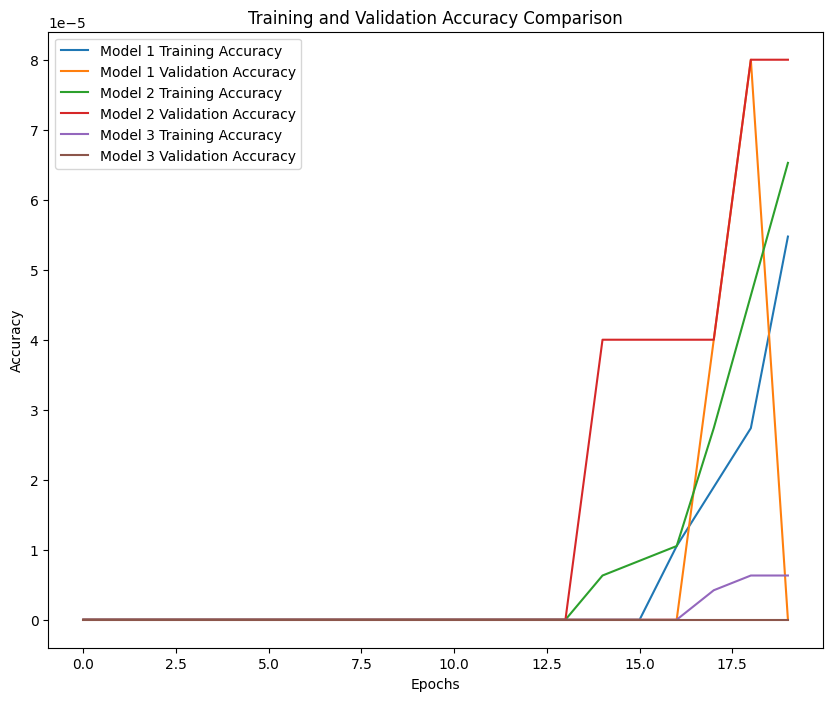

In [ ]:
# Plot the training and validation accuracy for the three models
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.plot(history3.history['accuracy'], label='Model 3 Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Regularisations

Modify the architecture designed initialy

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three


Model with Dropout of ratio 0.25

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 3000)              9219000   
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_25 (Dense)            (None, 1024)              3073024   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)

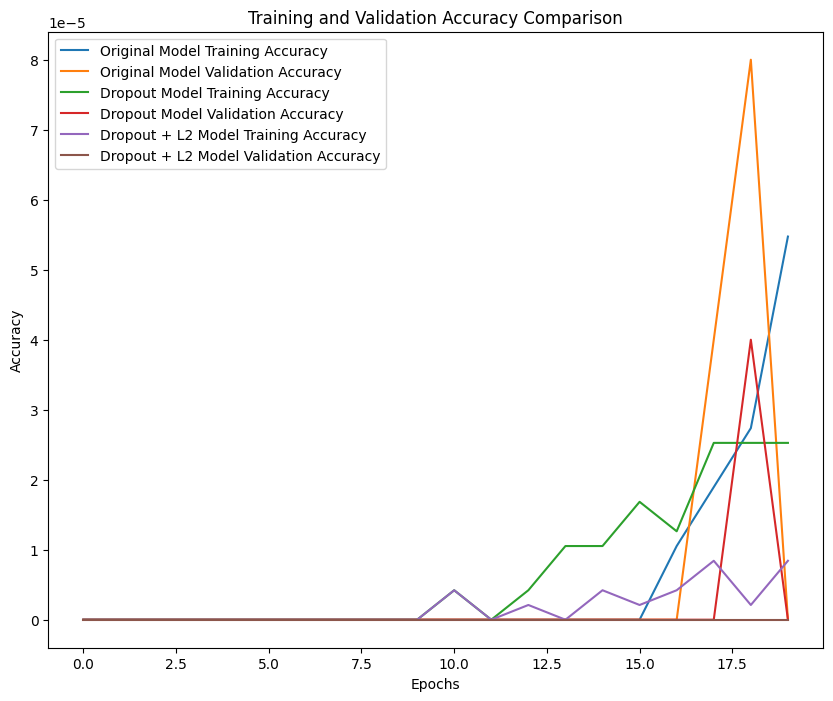

In [ ]:
# Model with Dropout of ratio 0.25
print("Model with Dropout of ratio 0.25\n")
model_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    keras.layers.Dropout(0.25),
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='sigmoid')
])
model_dropout.summary()

model_dropout.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)

history_dropout = model_dropout.fit(x_train, y_train, epochs=20, validation_split=(1/20))

print("Model with Dropout of ratio 0.25 and L2 regularization with factor 1e-04 \n")

# Model with Dropout of ratio 0.25 and L2 regularization with factor 1e-04
model_dropout_l2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 1
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1024, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 2
    keras.layers.Dropout(0.25),
    keras.layers.Dense(512, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 3
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 4
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 5
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 6
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(1e-04)),  #Hidden layer 7
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='sigmoid')
])
model_dropout_l2.summary()

# Compile and train the models


model_dropout_l2.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)


history_dropout_l2 = model_dropout_l2.fit(x_train, y_train, epochs=20, validation_split=(1/20))

# Plot the training and validation accuracy for comparison
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Original Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Original Model Validation Accuracy')
plt.plot(history_dropout.history['accuracy'], label='Dropout Model Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Model Validation Accuracy')
plt.plot(history_dropout_l2.history['accuracy'], label='Dropout + L2 Model Training Accuracy')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Dropout + L2 Model Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Optimisers -Score

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Ploting the comparison of the training and validation accuracy of the three

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_40 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_41 (Dense)            (None, 1024)              3073024   
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 64)               

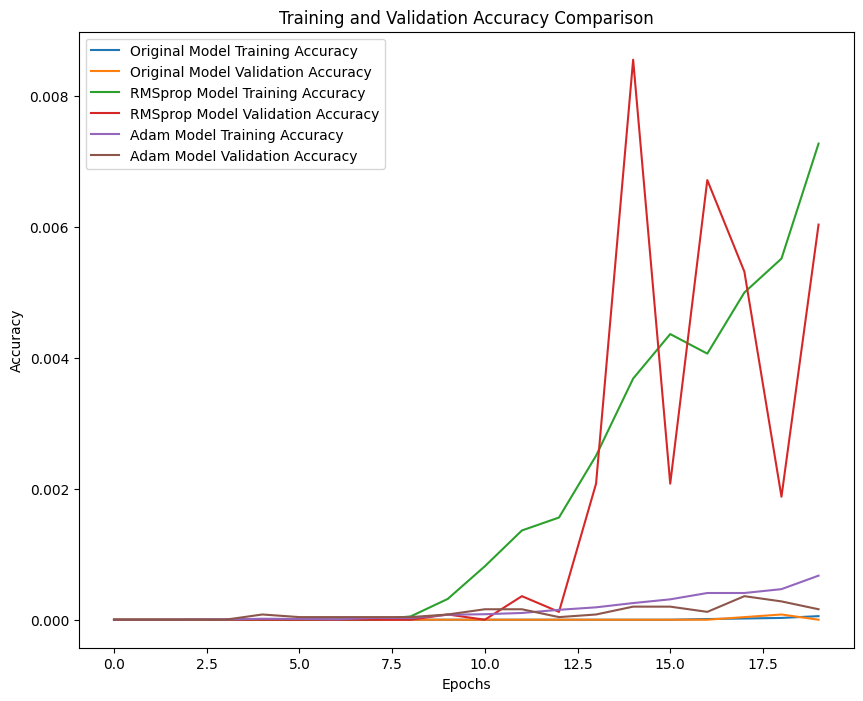

In [ ]:
# Model with RMSprop optimizer
model_rmsprop = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    keras.layers.Dense(10, activation='sigmoid')
])
model_rmsprop.summary()

# Configure RMSprop optimizer with custom hyperparameters
rmsprop_optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Compile and train the model with RMSprop optimizer
model_rmsprop.compile(
    optimizer=rmsprop_optimizer,
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)

history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=20, validation_split=(1/20))


# Model with Adam optimizer
model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    keras.layers.Dense(10, activation='sigmoid')
])
model_adam.summary()

# Configure Adam optimizer with custom hyperparameters
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile and train the model with Adam optimizer
model_adam.compile(
    optimizer=adam_optimizer,
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.Accuracy()]
)

history_adam = model_adam.fit(x_train, y_train, epochs=20, validation_split=(1/20))


# Plot the training and validation accuracy for comparison
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Original Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Original Model Validation Accuracy')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Model Training Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop Model Validation Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam Model Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Adam Model Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_56 (Dense)            (None, 3000)              9219000   
                                                                 
 batch_normalization (BatchN  (None, 3000)             12000     
 ormalization)                                                   
                                                                 
 dense_57 (Dense)            (None, 1024)              3073024   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_58 (Dense)            (None, 512)              

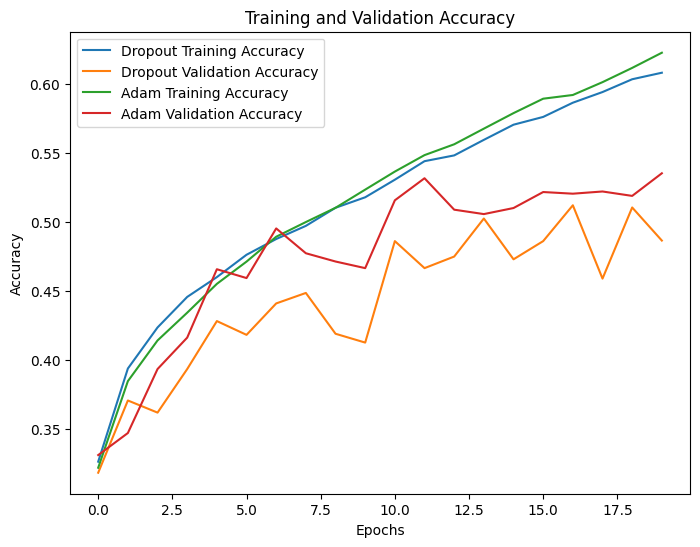

In [ ]:
# Model with Dropout
model_dropout = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    BatchNormalization(),  # Added batch normalization layer
    Dense(10, activation='sigmoid')
])
model_dropout.summary()

model_dropout.compile(
    optimizer=RMSprop(learning_rate=0.001),  # Adjusted learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_dropout = model_dropout.fit(x_train, y_train, epochs=20, validation_split=1/20)

# Model with Adam
model_adam = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),  #Hidden layer 1
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(1024, activation = "relu"),  #Hidden layer 2
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(512, activation = "relu"),  #Hidden layer 3
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(256, activation = "relu"),  #Hidden layer 4
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(128, activation = "relu"),  #Hidden layer 5
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(64, activation = "relu"),  #Hidden layer 6
    BatchNormalization(),  # Added batch normalization layer
    keras.layers.Dense(32, activation = "relu"),  #Hidden layer 7
    BatchNormalization(),  # Added batch normalization layer
    Dense(10, activation='sigmoid')
])
model_adam.summary()

model_adam.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_adam = model_adam.fit(x_train, y_train, epochs=20, validation_split=1/20)

# Plot comparison of training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history_dropout.history['accuracy'], label='Dropout Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Conclusion

Comparing on which model or architecture or regualiser or optimiser perfomed better.




```
As our original model we have used Keras sequential model for training with Relu as our activation layer for our hidden layers and we used Sigmoid as our activation function in the output layer.

We trained the model for 20 epochs. We use SGD for our optimiser as SGD updates the model parameter based on Gradients computed on the mini batch or subset of the dataset which helps in training a large dataset efficiently, in terms of hyperparameters as well the learning rate, momentum and decay rate are very important for SGD and it can be tuned on the basis of our requirements of the model.

We have used 8, 7, 9 layers for Models 1,2,3 respectively.
We have plotted their Training and validation Accuracy together for a fair comparison between them and we found that model 2 with 7 layers had highest training and validation Accuracy.

We can also observe that Model 3 performs well when comparing training accuracy with model 2 however it does not perform well enough in validation accuracy values.

The model 1 with 8 layers has its training and validation accuracy in similar levels though.

Comparing the original model with regularisation with dropout ratio of 0.25 vs dropout of 0.25 with L2 regularization with factor of 1e-04

Original model has the best training and validation accuracies when compared to the model with dropout and dropout + L2 regularization with increase in epoch runs.

However initially at 10 epoch levels the model with dropout and L2 regularization gets the advantage in terms of training accuracy but with increase in epochs the original model becomes the better performing model.

In terms of validation accuracy the best model is the model with dropout and L2 regularization is the best in terms of validation accuracy however with more epochs they all merge to have similar validation accuracies.

In terms of optimizers we observe that RMSProp performs far better when compared with original model with SGD or Adam model. It reaches better training and validation scores immediately after the training starts and holds the advantage over other models.

We can also observe that Adam performs better than original SGD model so we can comfortably say that model with RMSProp optimisers will train faster and perform better vs the other models in the training of sequential models.

We have also compared between model with dropout and Adam model to check on the impact of dropout vs optimisers and we can observe that training accuracies are comparable till 6 epochs and after that Adam consistently performs better in validation accuracy Adam model is consistently better vs dropout model with only exception being at epoch 6 and 18.

Overall we can conclude that models with 7 layers performed better vs models with 8 or 9 layers, use of dropouts initially worked well but with increase in epochs our original model performs better comparatively. Finally model with RMSProp optimizers worked better than models with Adam/SGD. Also Adam worked better than SGD+dropout model in our case.
```

